# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from see import classifiers
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

algorithm_space = classifiers.Classifier.algorithmspace
#X, y = make_moons(noise=0.3, random_state=0)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [2]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from sklearn.datasets import make_moons #, make_circles, make_classification
from sklearn.model_selection import train_test_split
from see.Workflow import workflow

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5
	max_features = 1



In [3]:
from see.base_classes import pipedata
from sklearn.model_selection import train_test_split

individual = Classifier()

dataset = pipedata()
training_set = pipedata()
testing_set = pipedata()

# Extract data
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

#training_set.X = X[:-1]
#training_set.y = y[:-1]
#testing_set.X = [X[-1]]
#testing_set.y = [y[-1]]

training_set.X = X_train
training_set.y = y_train
testing_set.X = X_test
testing_set.y = y_test

dataset.training_set = training_set
dataset.testing_set = testing_set

individual.runAlgo(dataset)

data <see.base_classes.pipedata object at 0x7f46a13c9eb0>
<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5
	max_features = 1

Time: 0.428 s


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = dataset

In [6]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=5)

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=20)

Initializing a new random population
Generation 0/20 of population size 5
data <see.base_classes.pipedata object at 0x7f46a09aa940>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 659
	alpha = 0.2497
	max_depth = 958
	n_estimators = 412
	n_neighbors = 488
	max_features = 283

HHHH RUNNING EVAL FOR GNB
Time: 0.01 s
fitness=0.3

data <see.base_classes.pipedata object at 0x7f46a09aa9a0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 468
	alpha = 0.2333
	max_depth = 732
	n_estimators = 554
	n_neighbors = 577
	max_features = 578

Time: 0.385 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a09aaac0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 938
	alpha = 0.0238
	max_depth = 604
	n_estimators = 973
	n_neighbors = 29
	max_features = 966

num_features 2
max_features 1
Time: 1.919 s
fitness=0.175

data <see.base_classes.pipedata object at 0x7f46a09aabe0>
<c

Time: 0.325 s
fitness=0.1

#BEST [0.1,  ['MLP Neural Network', 822, 0.2333, 253, 3, 577, 578]]
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 4/20 of population size 5
data <see.base_classes.pipedata object at 0x7f46a09aa580>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 845
	alpha = 0.6694
	max_depth = 675
	n_estimators = 601
	n_neighbors = 83
	max_features = 865

num_features 2
max_features 2
Time: 1.02 s
fitness=0.175

data <see.base_classes.pipedata object at 0x7f46a0

Time: 0.255 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a08e7670>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 822
	alpha = 0.1132
	max_depth = 253
	n_estimators = 3
	n_neighbors = 577
	max_features = 578

Time: 0.295 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a090e8b0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 822
	alpha = 0.2333
	max_depth = 732
	n_estimators = 3
	n_neighbors = 577
	max_features = 578

Time: 0.236 s
fitness=0.125

#BEST [0.1,  ['MLP Neural Network', 822, 0.1132, 253, 3, 577, 578]]
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mu

Time: 0.245 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a08e0a60>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 946
	alpha = 0.4547
	max_depth = 674
	n_estimators = 604
	n_neighbors = 756
	max_features = 557

Time: 0.366 s
fitness=0.125

data <see.base_classes.pipedata object at 0x7f46a0914e20>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 946
	alpha = 0.4547
	max_depth = 253
	n_estimators = 604
	n_neighbors = 577
	max_features = 557

Time: 0.288 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a0914100>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 822
	alpha = 0.1132
	max_depth = 674
	n_estimators = 3
	n_neighbors = 756
	max_features = 578

Time: 0.28 s
fitness=0.1

#BEST [0.1,  ['MLP Neural Network', 946, 0.4547, 674, 604, 756, 557]]
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm a

Time: 0.256 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a13e48e0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 460
	alpha = 0.0995
	max_depth = 964
	n_estimators = 178
	n_neighbors = 201
	max_features = 773

Time: 0.002 s
fitness=0.2

data <see.base_classes.pipedata object at 0x7f46a13e47c0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 740
	alpha = 0.4748
	max_depth = 911
	n_estimators = 1000
	n_neighbors = 943
	max_features = 823

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f46a13e4430>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 946
	alpha = 0.4547
	max_depth = 911
	n_estimators = 1000
	n_neighbors = 577
	max_features = 557

Time: 0.346 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a09c0100>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max

Time: 0.263 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f46a13e4e20>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 740
	alpha = 0.4748
	max_depth = 911
	n_estimators = 3
	n_neighbors = 943
	max_features = 823

RUNNING EVAL FOR KNN
Time: 0.009 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f46a13e4be0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 740
	alpha = 0.4748
	max_depth = 911
	n_estimators = 1000
	n_neighbors = 943
	max_features = 823

RUNNING EVAL FOR KNN
Time: 0.01 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f46a09c1070>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 740
	alpha = 0.4748
	max_depth = 253
	n_estimators = 3
	n_neighbors = 943
	max_features = 823

RUNNING EVAL FOR KNN
Time: 0.009 s
fitness=0.05

RUNNING EVAL FOR KNN
#BEST [0.05,  ['K Nearest Neighbors', 740, 0.4748, 911, 3, 943, 823]]
usin

num_features 2
max_features 2
num_features 2
max_features 1
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


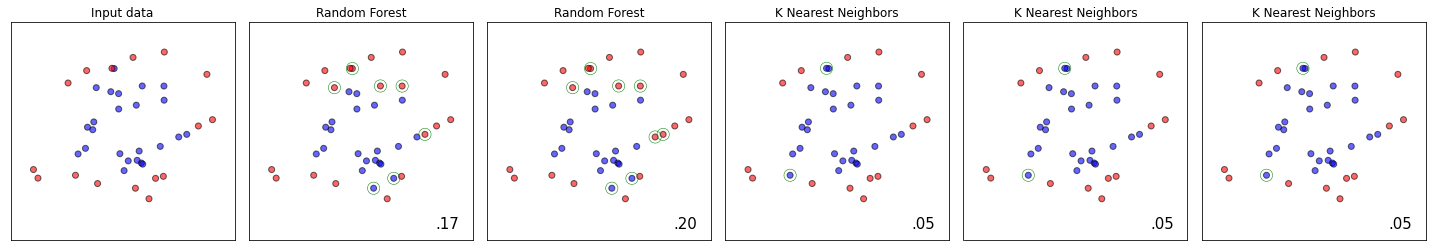

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Plot populations
# Plot
# Training Set (omitted)
# Subplot 1: Testing Set (Ground Truth)
# Subplot 2: Predictions for Testing Set

#cm = plt.cm.RdBu
h = 0.02

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(3,len(population) + 1,1)
# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")

for i, ind in enumerate(population):
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(3,len(population) + 1,i + 2)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    score = ClassifierFitness().evaluate(predictions, y_test)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
    # Highlight errors
    # TODO: looks funny, find a way to extract errors without [0]
    errors = np.where(np.not_equal(predictions, y_test))[0]
    for _, mistake in enumerate(errors):
        err = X_test[mistake,:]
        ax.scatter(err[0], err[1], marker='o', s=150, lw=0.5, color="green", facecolor="none")
    
    ax.set_title(algo_name)

#print(population)
#print(len(population))
#print(mydata.testing_set.X)
#print(mydata.testing_set.y)
plt.tight_layout()

In [9]:
my_evolver.hof[0]

['K Nearest Neighbors', 740, 0.4748, 911, 3, 943, 823]

## Playing with Classifiers
**This section of the notebook is not complete.**

This notebook is based on the notebook provided by the scikit learn package located at this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and provided at this [link](https://scikit-learn.org/stable/_downloads/3438aba177365cb595921cf18806dfa7/plot_classifier_comparison.ipynb).

The purpose of this notebook to recreate the example in the above notebook using the see implementation of the search space library for Classifiers.

TODO:
Integrate see-classify with Genetic Algorithms (i.e. `GeneticSearch`).

TypeError: cannot unpack non-iterable pipedata object

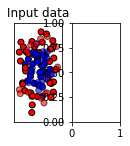

In [10]:
# Set up graph
h = 0.02
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(2, len(algorithm_space) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")
# Draw subplots
for i, name in enumerate(algorithm_space):
    ax = plt.subplot(2, len(algorithm_space) + 1, i+2)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # see-classify
    clf = algorithm_space[name]()
    predictions = clf.evaluate(dataset)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    
    # Print fitness score
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


plt.tight_layout()
